# B) Correlation / Métriques 

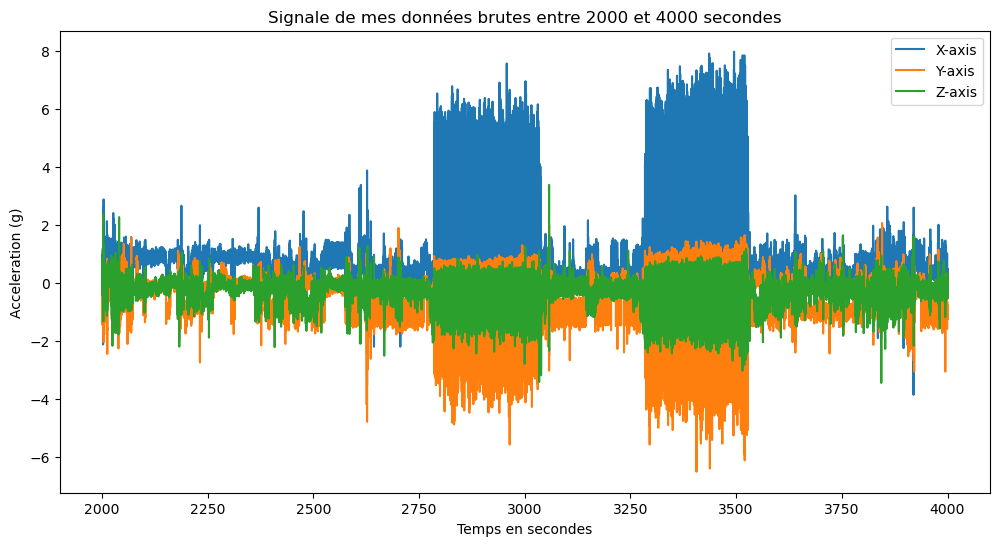

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
file_path = "/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/Github/HAH913E-2024-projet/AX3 Project/Sans titre/data/NoneSmokerCardio.csv"
data = pd.read_csv(file_path)

timestamp_column = data.columns[0]
signal_columns = data.columns[1:4]  # Sélectionner uniquement les colonnes 1, 2 et 3 pour le signal (X, Y, Z)

# Convertir la colonne de timestamps en datetime
data[timestamp_column] = pd.to_datetime(data[timestamp_column], errors='coerce')

# Supprimer les lignes avec des timestamps non valides
data = data.dropna(subset=[timestamp_column])

# Renommer les colonnes pour une meilleure clarté
data.columns = ['Temps', 'X', 'Y', 'Z']

# Calculer l'intervalle d'échantillonnage en secondes si possible
if len(data) > 1:
    sampling_interval = (
        data['Temps'].iloc[1] - data['Temps'].iloc[0]
    ).total_seconds()
else:
    raise ValueError("Le fichier contient moins de deux entrées valides pour calculer l'intervalle d'échantillonnage.")

# Créer une colonne pour le temps relatif en secondes
data['relative_time_seconds'] = data.index * sampling_interval

# Filtrer les données entre 2000 et 4000 secondes
data_filtered = data[(data['relative_time_seconds'] >= 2000) & (data['relative_time_seconds'] <= 4000)]

# Définir les étiquettes des axes et les couleurs
axis_labels = ['X-axis', 'Y-axis', 'Z-axis']
colors = {'X': '#1f77b4', 'Y': '#ff7f0e', 'Z': '#2ca02c'}

# Tracer le signal filtré
plt.figure(figsize=(12, 6))
for signal, axis_label, color in zip(['X', 'Y', 'Z'], axis_labels, colors.values()):  # Utiliser uniquement X, Y, Z
    plt.plot(data_filtered['relative_time_seconds'], data_filtered[signal], label=axis_label, color=color)

plt.title("Signale de mes données brutes entre 2000 et 4000 secondes")
plt.xlabel("Temps en secondes")
plt.ylabel("Acceleration (g)")
plt.legend()
plt.show()

Métriques des données filtrées (2000 à 4000 secondes) :

     Nombre de pics  Amplitude moyenne
Axe                                   
X           42207.0          11.828125
Y           45028.0           8.578125
Z           60105.0           6.828125

Matrice de corrélation entre les axes X, Y et Z :

          X         Y         Z
X  1.000000 -0.410216 -0.492788
Y -0.410216  1.000000  0.123404
Z -0.492788  0.123404  1.000000


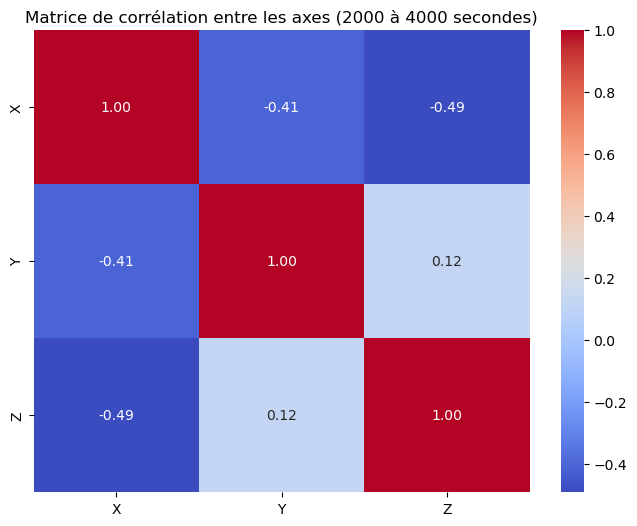

In [6]:
import pandas as pd
import numpy as np

# Fonction pour calculer des métriques de base
def calculate_metrics(signal):
    """
    Calcule les métriques pour un signal donné :
    - Nombre de pics (approximation avec une méthode simplifiée).
    - Amplitude moyenne (écart entre le max et le min).

    Parameters:
        signal (pandas.Series): Signal pour lequel les métriques seront calculées.

    Returns:
        dict: Dictionnaire avec le nombre de pics et l'amplitude moyenne.
    """
    # Nombre de pics (approximation basée sur la dérivée)
    peaks = ((signal.values[1:-1] > signal.values[:-2]) & 
             (signal.values[1:-1] > signal.values[2:]))
    num_peaks = np.sum(peaks)
    
    # Amplitude moyenne
    mean_amplitude = signal.max() - signal.min()
    
    return {'Nombre de pics': num_peaks, 'Amplitude moyenne': mean_amplitude}

# Calcul des métriques pour chaque axe
metrics = {}
for axis in ['X', 'Y', 'Z']:
    metrics[axis] = calculate_metrics(data_filtered[axis])

# Afficher les métriques sous forme de DataFrame pour plus de lisibilité
metrics_df = pd.DataFrame(metrics).T
metrics_df.index.name = 'Axe'
print("Métriques des données filtrées (2000 à 4000 secondes) :\n")
print(metrics_df)

# Calculer les corrélations entre les axes X, Y et Z
correlations = data_filtered[['X', 'Y', 'Z']].corr()

# Afficher la matrice de corrélation
print("\nMatrice de corrélation entre les axes X, Y et Z :\n")
print(correlations)

# Visualiser la matrice de corrélation avec un heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Matrice de corrélation entre les axes (2000 à 4000 secondes)")
plt.show()


Analyse des Métriques :

Nombre de pics : 
- L'axe X présente le moins de pics, cela réflète les oscillations d'avant en arrière, dues à la propulsion/ impact pendant la course. Ces variations sont dynamiques mais légèrement moins intenses que sur Y ou Z.
- L'axe Y  représente les mouvements latéraux (balancement des bras ), il présente légérement plus de pics que X.
- L'axe Z présente le plus de pics, ceci est attendu car il représente les oscillations capte le plus grand nombre de pics, ce qui est attendu puisqu'il représente les oscillations verticales (haut-bas) dues aux impacts au sol à chaque foulée. Les mouvements verticaux sont typiquement plus réguliers et fréquents pendant une course.

Amplitude moyenne :
- L'axe X a l'amplitude la plus élevée. Cela indique que les accélérations avant-arrière sont plus prononcées, probablement dues à la propulsion dynamique vers l'avant et aux forces exercées pendant les poussées ou freinages.
- L'axe Y présente une amplitude modérée, correspondant aux mouvements latéraux. Ces mouvements sont moins intenses que ceux avant-arrière mais restent significatifs pour maintenir l'équilibre
- L'axe Z a l'amplitude la plus faible, ce qui est normal, car les oscillations verticales (rebonds) sont généralement contrôlées pour limiter la perte d'énergie.


Corrélation entre X/Y  et X/Z: On observe une corrélation négative faible entre les mouvements avant-Arrière et les mouvements latéraux. Ceci indique que les forces avant-arrières sont priorisées,  tandis que les mouvements latéraux et verticaux sont contrôlés pour minimiser les pertes d'énergie.
Corrélation Y/Z : On observe une corrélation positive faible entre les mouvements latéraux et verticaux ainsi on peut en déduire que la stabilité latérale est partiellement liée aux ajustements verticaux. .
